## Problem Statement: 
**How many store clerks are requeried in diffrent shifts to manage the store**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
dataset = pd.read_csv('/Users/rishavdas/Downloads/Data/retail_dataset.csv')
dataset.head()

Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam

In [7]:
dataset.shape

(21293, 4)

In [11]:
dataset['Year'] = [i.split('-')[0] for i in dataset.Date]
dataset['Month'] = [i.split('-')[1] for i in dataset.Date]
dataset['Day'] = [i.split('-')[2] for i in dataset.Date]
dataset['Hour'] = [i.split(':')[0] for i in dataset.Time]

In [12]:
dataset.head()

Date      Time  Transaction           Item  Year Month Day Hour
0  2016-10-30  09:58:11            1          Bread  2016    10  30   09
1  2016-10-30  10:05:34            2   Scandinavian  2016    10  30   10
2  2016-10-30  10:05:34            2   Scandinavian  2016    10  30   10
3  2016-10-30  10:07:57            3  Hot chocolate  2016    10  30   10
4  2016-10-30  10:07:57            3            Jam  2016    10  30   10

In [13]:
dataset.Date.min()

'2016-10-30'

In [14]:
dataset.Date.max()

'2017-04-09'

In [15]:
dataset.Item.nunique()

95

## Most Sold Items 

In [18]:
from collections import Counter 
Total_sales = Counter(dataset.Item)
most_frequent_sales = Total_sales.most_common(15)
print(most_frequent_sales)
x, y = zip(*most_frequent_sales)
x, y = list(x), list(y)
names = pd.DataFrame(x)
no_of_sales = pd.DataFrame(y)
most_sold_item = pd.concat([names.iloc[:, 0], no_of_sales.iloc[:, 0]], axis=1)
most_sold_item.columns = "Items", 'Frequency_of_Sales'
most_sold_item

[('Coffee', 5471), ('Bread', 3325), ('Tea', 1435), ('Cake', 1025), ('Pastry', 856), ('NONE', 786), ('Sandwich', 771), ('Medialuna', 616), ('Hot chocolate', 590), ('Cookies', 540), ('Brownie', 379), ('Farm House', 374), ('Muffin', 370), ('Juice', 369), ('Alfajores', 369)]


Items  Frequency_of_Sales
0          Coffee                5471
1           Bread                3325
2             Tea                1435
3            Cake                1025
4          Pastry                 856
5            NONE                 786
6        Sandwich                 771
7       Medialuna                 616
8   Hot chocolate                 590
9         Cookies                 540
10        Brownie                 379
11     Farm House                 374
12         Muffin                 370
13          Juice                 369
14      Alfajores                 369

In [20]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)
val = most_sold_item.Items
fig = {
    'data': [{
        'values': most_sold_item.iloc[:, 1],
        'labels': val,
        'name': 'Product',
        'hoverinfo': 'label+percent+name',
        'hole': .4,
        'type': 'pie'
    }],
    'layout': {
        'title': "Most Sold Product - Top 15 ",
        'annotations': [{
            'font': {
                'size': 20
            },
            'showarrow': False,
            'text': 'Most Sold',
            'x': .5,
            'y': .5
        }]
    }
}
iplot(fig)

In [24]:
labels = x
values = y
trace = go.Pie(labels=labels,
               values=values,
               hoverinfo="label+percent",
               textinfo='value',
               textfont=dict(size=20),
               marker=dict(line=dict(color="#000000", width=2)))
iplot([trace], filename="graph_objs_pie_chart")

## Hourly Trend analysis

In [30]:
hours_list = sorted(list(dataset.Hour.unique()))
items_per_hr = []

for i in hours_list:
    x = dataset[dataset.Hour ==i]
    items_per_hr.append(Counter(x.Item))

In [32]:
hours_list

['01',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [31]:
items_per_hr

[Counter({'Bread': 1}),
 Counter({'Coffee': 13,
          'Pastry': 2,
          'Bread': 2,
          'Medialuna': 6,
          'Toast': 1,
          'NONE': 1}),
 Counter({'Coffee': 199,
          'Cake': 8,
          'Tartine': 1,
          'NONE': 24,
          'Bread': 171,
          'Pastry': 57,
          'Jam': 7,
          'Tea': 21,
          'Hot chocolate': 9,
          'Coke': 1,
          'Medialuna': 43,
          'Farm House': 13,
          'Sandwich': 5,
          'Scandinavian': 6,
          'Fudge': 2,
          'Granola': 1,
          'Brownie': 5,
          'Keeping It Local': 3,
          'Siblings': 2,
          'Muffin': 3,
          'Toast': 23,
          'Cookies': 12,
          'Scone': 6,
          'Juice': 4,
          'Vegan mincepie': 1,
          'Alfajores': 4,
          'Dulce de Leche': 1,
          'Muesli': 2,
          'Panatone': 1,
          'Gingerbread syrup': 1,
          'Afternoon with the baker': 3,
          'Nomad bag': 1,
          'Bagu

In [34]:
product_hours = pd.DataFrame(items_per_hr).set_index([hours_list])

In [36]:
product_hours

Bread  Coffee  Pastry  Medialuna  Toast   NONE   Cake  Tartine   Jam  \
01    1.0     NaN     NaN        NaN    NaN    NaN    NaN      NaN   NaN   
07    2.0    13.0     2.0        6.0    1.0    1.0    NaN      NaN   NaN   
08  171.0   199.0    57.0       43.0   23.0   24.0    8.0      1.0   7.0   
09  400.0   583.0   191.0      120.0   64.0   79.0   40.0      4.0  22.0   
10  508.0   820.0   203.0      125.0   61.0   97.0   83.0      3.0  23.0   
11  528.0   946.0   151.0      108.0   55.0  114.0  133.0     11.0  28.0   
12  474.0   740.0    97.0       55.0   45.0  167.0  127.0     11.0  15.0   
13  340.0   607.0    48.0       36.0   23.0  159.0  124.0      9.0  12.0   
14  341.0   636.0    49.0       48.0   22.0   96.0  182.0      2.0  22.0   
15  310.0   519.0    32.0       34.0   16.0   32.0  174.0      4.0   9.0   
16  196.0   321.0    16.0       25.0    8.0   13.0  124.0      1.0   3.0   
17   46.0    69.0     8.0       11.0    NaN    4.0   30.0      1.0   6.0   
18    6.0    11.0     2.0        4.0    NaN    NaN    NaN      NaN   2.0   
19    2.0     6.0     NaN        1.0    NaN    NaN    NaN      NaN   NaN   
20    NaN     1.0     NaN        NaN    NaN    NaN    NaN      NaN   NaN   
21    NaN     NaN     NaN        NaN    NaN    NaN    NaN      NaN   NaN   
22    NaN     NaN     NaN        NaN    NaN    NaN    NaN      NaN   NaN   
23    NaN     NaN     NaN        NaN    NaN    NaN    NaN      NaN   NaN   

      Tea  ...  Spread  Bare Popcorn  Olum & polenta  Polenta  Raw bars  \
01    NaN  ...     NaN           NaN             NaN      NaN       NaN   
07    NaN  ...     NaN           NaN             NaN      NaN       NaN   
08   21.0  ...     NaN           NaN             NaN      NaN       NaN   
09  103.0  ...     NaN           NaN             NaN      NaN       NaN   
10  156.0  ...     NaN           NaN             NaN      NaN       NaN   
11  176.0  ...     NaN           NaN             NaN      NaN       NaN   
12  183.0  ...     NaN           NaN             NaN      NaN       NaN   
13  181.0  ...     1.0           1.0             NaN      NaN       NaN   
14  233.0  ...     1.0           2.0             1.0      1.0       1.0   
15  207.0  ...     NaN           NaN             NaN      NaN       NaN   
16  126.0  ...     NaN           1.0             NaN      NaN       NaN   
17   41.0  ...     NaN           1.0             NaN      NaN       NaN   
18    5.0  ...     NaN           NaN             NaN      NaN       NaN   
19    3.0  ...     NaN           NaN             NaN      NaN       NaN   
20    NaN  ...     NaN           NaN             NaN      NaN       NaN   
21    NaN  ...     NaN           NaN             NaN      NaN       NaN   
22    NaN  ...     NaN           NaN             NaN      NaN       NaN   
23    NaN  ...     NaN           NaN             NaN      NaN       NaN   

    Hack the stack  Tshirt  Adjustment  Pintxos  Postcard  
01             NaN     NaN         NaN      NaN       NaN  
07             NaN     NaN         NaN      NaN       NaN  
08             NaN     NaN         NaN      NaN       NaN  
09             NaN     NaN         NaN      NaN       NaN  
10             NaN     NaN         NaN      NaN       NaN  
11             NaN     NaN         NaN      NaN       NaN  
12             NaN     NaN         NaN      NaN       NaN  
13             NaN     NaN         NaN      NaN       NaN  
14             NaN     NaN         NaN      NaN       NaN  
15             NaN     NaN         NaN      NaN       NaN  
16             1.0     NaN         NaN      NaN       NaN  
17             1.0     NaN         NaN      NaN       NaN  
18             NaN     5.0         NaN      NaN       NaN  
19             NaN    11.0         1.0      2.0       3.0  
20             NaN     5.0         NaN      4.0       7.0  
21             NaN     NaN         NaN      NaN       NaN  
22             NaN     NaN         NaN      NaN       NaN  
23             NaN     NaN         NaN      NaN      

In [43]:
sales_list = []
sales_list_sum = []
sales_list_avg = []
for i in hours_list:
    sales_list.append(product_hours.loc[i, :].sum())
    counter_val = dataset[dataset.Hour == i]
    sales_list_sum.append(counter_val.Item.value_counts())
    sales_list_avg.append(((counter_val.Item.value_counts())/len(counter_val.Hour)*100))
sales_list = (pd.DataFrame(sales_list)).set_index([hours_list])
sales_list['Hours'] = sales_list.index
sales_list.columns = "Number of sales", "Hours"
sales_list_sum = (pd.DataFrame(sales_list_sum)).set_index([hours_list])
sales_list_percent = (pd.DataFrame(sales_list_avg)).set_index([hours_list])

In [44]:
sales_list

Number of sales Hours
01              1.0    01
07             25.0    07
08            669.0    08
09           2045.0    09
10           2763.0    10
11           3216.0    11
12           3021.0    12
13           2776.0    13
14           2736.0    14
15           2147.0    15
16           1356.0    16
17            372.0    17
18             82.0    18
19             48.0    19
20             22.0    20
21              3.0    21
22              8.0    22
23              3.0    23

In [45]:
sales_list_sum

Bread  Coffee  Medialuna  Pastry   NONE  Toast    Tea  Farm House  \
01    1.0     NaN        NaN     NaN    NaN    NaN    NaN         NaN   
07    2.0    13.0        6.0     2.0    1.0    1.0    NaN         NaN   
08  171.0   199.0       43.0    57.0   24.0   23.0   21.0        13.0   
09  400.0   583.0      120.0   191.0   79.0   64.0  103.0        64.0   
10  508.0   820.0      125.0   203.0   97.0   61.0  156.0        55.0   
11  528.0   946.0      108.0   151.0  114.0   55.0  176.0        78.0   
12  474.0   740.0       55.0    97.0  167.0   45.0  183.0        58.0   
13  340.0   607.0       36.0    48.0  159.0   23.0  181.0        37.0   
14  341.0   636.0       48.0    49.0   96.0   22.0  233.0        21.0   
15  310.0   519.0       34.0    32.0   32.0   16.0  207.0        25.0   
16  196.0   321.0       25.0    16.0   13.0    8.0  126.0        14.0   
17   46.0    69.0       11.0     8.0    4.0    NaN   41.0         6.0   
18    6.0    11.0        4.0     2.0    NaN    NaN    5.0         3.0   
19    2.0     6.0        1.0     NaN    NaN    NaN    3.0         NaN   
20    NaN     1.0        NaN     NaN    NaN    NaN    NaN         NaN   
21    NaN     NaN        NaN     NaN    NaN    NaN    NaN         NaN   
22    NaN     NaN        NaN     NaN    NaN    NaN    NaN         NaN   
23    NaN     NaN        NaN     NaN    NaN    NaN    NaN         NaN   

    Cookies  Hot chocolate  ...  Bare Popcorn  Spread  Raw bars  Polenta  \
01      NaN            NaN  ...           NaN     NaN       NaN      NaN   
07      NaN            NaN  ...           NaN     NaN       NaN      NaN   
08     12.0            9.0  ...           NaN     NaN       NaN      NaN   
09     39.0           56.0  ...           NaN     NaN       NaN      NaN   
10     77.0           76.0  ...           NaN     NaN       NaN      NaN   
11     78.0           91.0  ...           NaN     NaN       NaN      NaN   
12     67.0           56.0  ...           NaN     NaN       NaN      NaN   
13     61.0           51.0  ...           1.0     1.0       NaN      NaN   
14     49.0           68.0  ...           2.0     1.0       1.0      1.0   
15     77.0           89.0  ...           NaN     NaN       NaN      NaN   
16     59.0           71.0  ...           1.0     NaN       NaN      NaN   
17     20.0           14.0  ...           1.0     NaN       NaN      NaN   
18      1.0            4.0  ...           NaN     NaN       NaN      NaN   
19      NaN            3.0  ...           NaN     NaN       NaN      NaN   
20      NaN            NaN  ...           NaN     NaN       NaN      NaN   
21      NaN            2.0  ...           NaN     NaN       NaN      NaN   
22      NaN            NaN  ...           NaN     NaN       NaN      NaN   
23      NaN            NaN  ...           NaN     NaN       NaN      NaN   

    Olum & polenta  Hack the stack  Tshirt  Postcard  Pintxos  Adjustment  
01             NaN             NaN     NaN       NaN      NaN         NaN  
07             NaN             NaN     NaN       NaN      NaN         NaN  
08             NaN             NaN     NaN       NaN      NaN         NaN  
09             NaN             NaN     NaN       NaN      NaN         NaN  
10             NaN             NaN     NaN       NaN      NaN         NaN  
11             NaN             NaN     NaN       NaN      NaN         NaN  
12             NaN             NaN     NaN       NaN      NaN         NaN  
13             NaN             NaN     NaN       NaN      NaN         NaN  
14             1.0             NaN     NaN       NaN      NaN         NaN  
15             NaN             NaN     NaN       NaN      NaN         NaN  
16             NaN             1.0     NaN       NaN      NaN         NaN  
17             NaN             1.0     NaN       NaN      NaN         NaN  
18             NaN             NaN     5.0       NaN      NaN         NaN  
19             NaN             NaN    11.0       3.0      2.0         1.0  
20             NaN             

In [46]:
sales_list_percent

Bread     Coffee  Medialuna    Pastry      NONE     Toast        Tea  \
01  100.000000        NaN        NaN       NaN       NaN       NaN        NaN   
07    8.000000  52.000000  24.000000  8.000000  4.000000  4.000000        NaN   
08   25.560538  29.745889   6.427504  8.520179  3.587444  3.437967   3.139013   
09   19.559902  28.508557   5.867971  9.339853  3.863081  3.129584   5.036675   
10   18.385813  29.677886   4.524068  7.347087  3.510677  2.207745   5.646037   
11   16.417910  29.415423   3.358209  4.695274  3.544776  1.710199   5.472637   
12   15.690169  24.495200   1.820589  3.210857  5.527971  1.489573   6.057597   
13   12.247839  21.865994   1.296830  1.729107  5.727666  0.828530   6.520173   
14   12.463450  23.245614   1.754386  1.790936  3.508772  0.804094   8.516082   
15   14.438752  24.173265   1.583605  1.490452  1.490452  0.745226   9.641360   
16   14.454277  23.672566   1.843658  1.179941  0.958702  0.589971   9.292035   
17   12.365591  18.548387   2.956989  2.150538  1.075269       NaN  11.021505   
18    7.317073  13.414634   4.878049  2.439024       NaN       NaN   6.097561   
19    4.166667  12.500000   2.083333       NaN       NaN       NaN   6.250000   
20         NaN   4.545455        NaN       NaN       NaN       NaN        NaN   
21         NaN        NaN        NaN       NaN       NaN       NaN        NaN   
22         NaN        NaN        NaN       NaN       NaN       NaN        NaN   
23         NaN        NaN        NaN       NaN       NaN       NaN        NaN   

    Farm House   Cookies  Hot chocolate  ...  Bare Popcorn    Spread  \
01         NaN       NaN            NaN  ...           NaN       NaN   
07         NaN       NaN            NaN  ...           NaN       NaN   
08    1.943199  1.793722       1.345291  ...           NaN       NaN   
09    3.129584  1.907090       2.738386  ...           NaN       NaN   
10    1.990590  2.786826       2.750633  ...           NaN       NaN   
11    2.425373  2.425373       2.829602  ...           NaN       NaN   
12    1.919894  2.217809       1.853691  ...           NaN       NaN   
13    1.332853  2.197406       1.837176  ...      0.036023  0.036023   
14    0.767544  1.790936       2.485380  ...      0.073099  0.036550   
15    1.164415  3.586400       4.145319  ...           NaN       NaN   
16    1.032448  4.351032       5.235988  ...      0.073746       NaN   
17    1.612903  5.376344       3.763441  ...      0.268817       NaN   
18    3.658537  1.219512       4.878049  ...           NaN       NaN   
19         NaN       NaN       6.250000  ...           NaN       NaN   
20         NaN       NaN            NaN  ...           NaN       NaN   
21         NaN       NaN      66.666667  ...           NaN       NaN   
22         NaN       NaN            NaN  ...           NaN       NaN   
23         NaN       NaN            NaN  ...           NaN       NaN   

    Raw bars  Polenta  Olum & polenta  Hack the stack     Tshirt   Postcard  \
01       NaN      NaN             NaN             NaN        NaN        NaN   
07       NaN      NaN             NaN             NaN        NaN        NaN   
08       NaN      NaN             NaN             NaN        NaN        NaN   
09       NaN      NaN             NaN             NaN        NaN        NaN   
10       NaN      NaN             NaN             NaN        NaN        NaN   
11       NaN      NaN             NaN             NaN        NaN        NaN   
12       NaN      NaN             NaN             NaN        NaN        NaN   
13       NaN      NaN             NaN             NaN        NaN        NaN   
14   0.03655  0.03655         0.03655             NaN        NaN        NaN   
15       NaN      NaN             NaN             NaN        NaN        NaN   
16       NaN      NaN             NaN        0.073746        NaN        NaN   
17       NaN      NaN             NaN        0.268817        NaN        NaN   
18       NaN      NaN             NaN             NaN   6.097561        N

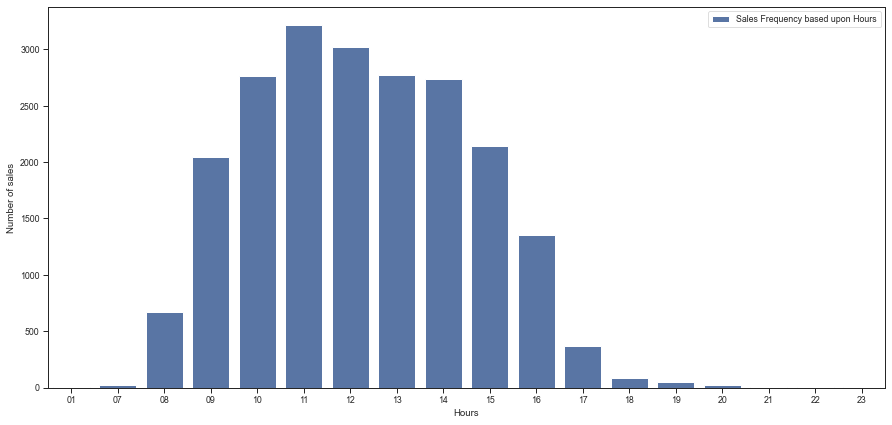

In [50]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15, 7))
sns.set(style='ticks')
sns.barplot(
    x='Hours',
    y="Number of sales",
    data=sales_list,
    label="Sales Frequency based upon Hours",
    color='b',
)
sns.set_context('paper')
ax.legend(ncol=2, loc="upper right", frameon=True)